# Scraping Exchange Rates with Python, BeautifulSoup Package

### Importing Required Libraries

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

### Scraping the Latest Exchange Rates From https://www.dab.gov.af/exchange-rates

In [3]:
#### Fetching the Web Page

url = "https://www.dab.gov.af/exchange-rates"
page = requests.get(url)
contents = BeautifulSoup(page.text, 'html.parser')
print(contents)

<!DOCTYPE html>

<html dir="ltr" lang="en" prefix="content: http://purl.org/rss/1.0/modules/content/  dc: http://purl.org/dc/terms/  foaf: http://xmlns.com/foaf/0.1/  og: http://ogp.me/ns#  rdfs: http://www.w3.org/2000/01/rdf-schema#  schema: http://schema.org/  sioc: http://rdfs.org/sioc/ns#  sioct: http://rdfs.org/sioc/types#  skos: http://www.w3.org/2004/02/skos/core#  xsd: http://www.w3.org/2001/XMLSchema# ">
<head>
<meta charset="utf-8"/>
<script>(function(i,s,o,g,r,a,m){i["GoogleAnalyticsObject"]=r;i[r]=i[r]||function(){(i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)})(window,document,"script","https://www.google-analytics.com/analytics.js","ga");ga("create", "UA-129433847-1", {"cookieDomain":"auto"});ga("set", "anonymizeIp", true);ga("send", "pageview");</script>
<meta content="Drupal 8 (https://www.drupal.org)" name="Generator"/>
<meta content="width" name="MobileOptimi

In [4]:
#### Selecting the Target Table

# contents.select('table')
# contents.select('table')[0]
# contents.select('table')[1]
target_table = contents.select('table')[0]
print(target_table)

<table class="table table-striped text-center">
<thead>
<tr>
<th class="row_0 col_0">Currency</th>
<th class="row_0 col_1">Cash (Sell)</th>
<th class="row_0 col_2">Cash (Buy)</th>
<th class="row_0 col_3">Transfer (Sell)</th>
<th class="row_0 col_4">Transfer (Buy)</th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td class="row_1 col_0">USD$</td>
<td class="row_1 col_1">71.1577</td>
<td class="row_1 col_2">70.9577</td>
<td class="row_1 col_3">71.1077</td>
<td class="row_1 col_4">71.0077</td>
</tr>
<tr class="even">
<td class="row_2 col_0">EURO€</td>
<td class="row_2 col_1">75.7360</td>
<td class="row_2 col_2">75.1360</td>
<td class="row_2 col_3">75.5660</td>
<td class="row_2 col_4">75.3060</td>
</tr>
<tr class="odd">
<td class="row_3 col_0">POUND£</td>
<td class="row_3 col_1">89.0010</td>
<td class="row_3 col_2">88.2010</td>
<td class="row_3 col_3">88.7510</td>
<td class="row_3 col_4">88.4510</td>
</tr>
<tr class="even">
<td class="row_4 col_0">SWISS₣</td>
<td class="row_4 col_1">77.9582</td

In [5]:
#### Extracting the Header

# target_table.select('thead > tr > th')
# target_table.select('thead > tr > th')[0]
# target_table.select('thead > tr > th')[0].text
# target_table.select('thead > tr > th')[0].text.strip()

header = []
for th in target_table.select('thead > tr > th'):
    header.append(th.text.strip())

print(header)

['Currency', 'Cash (Sell)', 'Cash (Buy)', 'Transfer (Sell)', 'Transfer (Buy)']


In [7]:
#### Extracting the Rows

# target_table.select('tbody > tr')
# target_table.select('tbody > tr')[0]
# target_table.select('tbody > tr')[0].select('td')
# target_table.select('tbody > tr')[0].select('td')[0]
# target_table.select('tbody > tr')[0].select('td')[0].text
# target_table.select('tbody > tr')[0].select('td')[0].text.strip()

# for tr in target_table.select('tbody > tr'):
#     print(tr)
#     print("------------------")

# for tr in target_table.select('tbody > tr'):
#     tds = tr.select('td')
#     print(tds)
#     print("------------------")

# for tr in target_table.select('tbody > tr'):
#     tds = tr.select('td')
#     row = [td.text.strip() for td in tds]
#     print(row)
#     print("------------------")

rows = []
for tr in target_table.select('tbody > tr'):
    tds = tr.select('td')
    row = [td.text.strip() for td in tds]
    rows.append(row)

print(rows)

[['USD$', '71.1577', '70.9577', '71.1077', '71.0077'], ['EURO€', '75.7360', '75.1360', '75.5660', '75.3060'], ['POUND£', '89.0010', '88.2010', '88.7510', '88.4510'], ['SWISS₣', '77.9582', '77.4582', '77.8082', '77.6082'], ['INDIAN Rs.', '0.8171', '0.8071', '0.8141', '0.8101'], ['PAKISTAN Rs.', '0.2580', '0.2500', '0.2550', '0.2530'], ['IRAN Toman', '0.0015', '0.0009', '0.0014', '0.0010'], ['CNY¥', '10.2725', '9.8725', '10.1725', '9.9725'], ['UAE DIRHAM', '19.3093', '19.2093', '19.2893', '19.2293'], ['SAUDI RIYAL', '18.8300', '18.7300', '18.8100', '18.7500']]


In [8]:
#### Creating a DataFrame

df = pd.DataFrame(rows, columns=header)
df

,Currency,Cash (Sell),Cash (Buy),Transfer (Sell),Transfer (Buy)
0,USD$,71.1577,70.9577,71.1077,71.0077
1,EURO€,75.7360,75.1360,75.5660,75.3060
2,POUND£,89.0010,88.2010,88.7510,88.4510
3,SWISS₣,77.9582,77.4582,77.8082,77.6082
4,INDIAN Rs.,0.8171,0.8071,0.8141,0.8101
5,PAKISTAN Rs.,0.2580,0.2500,0.2550,0.2530
6,IRAN Toman,0.0015,0.0009,0.0014,0.0010
7,CNY¥,10.2725,9.8725,10.1725,9.9725
8,UAE DIRHAM,19.3093,19.2093,19.2893,19.2293
9,SAUDI RIYAL,18.8300,18.7300,18.8100,18.7500


### Scraping exchange rates from January 1, 2020, to June 28, 2024.

In [ ]:
start = datetime.strptime("01/01/2020", "%m/%d/%Y")
end = datetime.strptime("06/28/2024", "%m/%d/%Y")
result = pd.DataFrame()

while start <= end:

    date = start.strftime('%m/%d/%Y')
    url = f"https://www.dab.gov.af/exchange-rates?field_date_value={date}"
    page = requests.get(url)
    contents = BeautifulSoup(page.text, 'html.parser')

    if contents.select('table'):
        target_table = contents.select('table')[0]

        header = []
        for th in target_table.select('thead > tr > th'):
            header.append(th.text.strip())

        rows = []
        for tr in target_table.select('tbody > tr'):
            tds = tr.select('td')
            row = [td.text.strip() for td in tds]
            rows.append(row)

        df = pd.DataFrame(rows, columns=header)
        df['Date'] = date
        
        result = pd.concat([result, df], ignore_index=True)

        print(f"Scraping the data from {date}")

    else:
        print(f"No date available for {date}")

    start += timedelta(days=1)


In [106]:
result.head()

,Currency,Cash (Sell),Cash (Buy),Transfer (Sell),Transfer (Buy),Date,Currency_cleaned
0,USD$,77.2519,77.0519,77.2019,77.1019,01/01/2020,USD$
1,EURO€,86.6275,86.0275,86.4575,86.1975,01/01/2020,EURO€
2,POUND£,101.7175,100.9175,101.4675,101.1675,01/01/2020,POUND£
3,SWISS₣,78.3750,77.8750,78.2250,78.0250,01/01/2020,SWISS₣
4,INDIAN Rs.,1.0929,1.0829,1.0899,1.0859,01/01/2020,INDIAN Rs.


In [107]:
### save the result in .csv and .xlsx files
result.to_csv('output/data_raw.csv', index=False)
result.to_excel('output/data_raw.xlsx', index=False)

In [76]:
### recode / clean the 'Currency' column

def transform_currency(currency):
    if currency in ["EURO", "یورو"]:
        return "EURO€"
    elif currency in ["INDIAN", "INR", "روپیه هندی", "رویپه هندی"]:
        return "INDIAN Rs."
    elif currency in ["IRT", "TOMAN|IR TO", "تومان ایرانی"]:
        return "IRAN Toman"
    elif currency in ["PAKISTAN Rs|PKR", "PKR", "روپیه پاکستانی"]:
        return "PAKISTAN Rs."
    elif currency in ["POUND", "GBP", "پوند استرلنگ"]:
        return "POUND£"
    elif currency in ["SAR", "SAUDI RIYAL|SAR", "ریال سعودی"]:
        return "SAUDI RIYAL"
    elif currency in ["SWISS", "فرانک  سویس", "فرانک سویس"]:
        return "SWISS₣"
    elif currency in ["UAE DARHAM|UAE", "AED", "درهم امارات"]:
        return "UAE DIRHAM"
    elif currency in ["US DOLLAR", "USD", "دالر امریکایی", "دالرامریکایی"]:
        return "USD$"
    elif currency in ["یو وان چینایی", "یووان چینایی"]:
        return "CNY¥"
    else:
        return currency
    
result['Currency_cleaned'] = result['Currency'].apply(lambda x: transform_currency(x))

In [28]:
### save the cleaned data

result.to_csv('output/data_cleaned.csv', index=False)
result.to_excel('output/data_cleaned.xlsx', index=False)

### Plotting the data

/var/folders/9b/ny52bl9x5rj_jtsydmk5j96m0000gq/T/ipykernel_60609/1526586798.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cash (Sell)'] = pd.to_numeric(df['Cash (Sell)'])
/var/folders/9b/ny52bl9x5rj_jtsydmk5j96m0000gq/T/ipykernel_60609/1526586798.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cash (Buy)'] = pd.to_numeric(df['Cash (Buy)'])


<Figure size 1200x800 with 0 Axes>

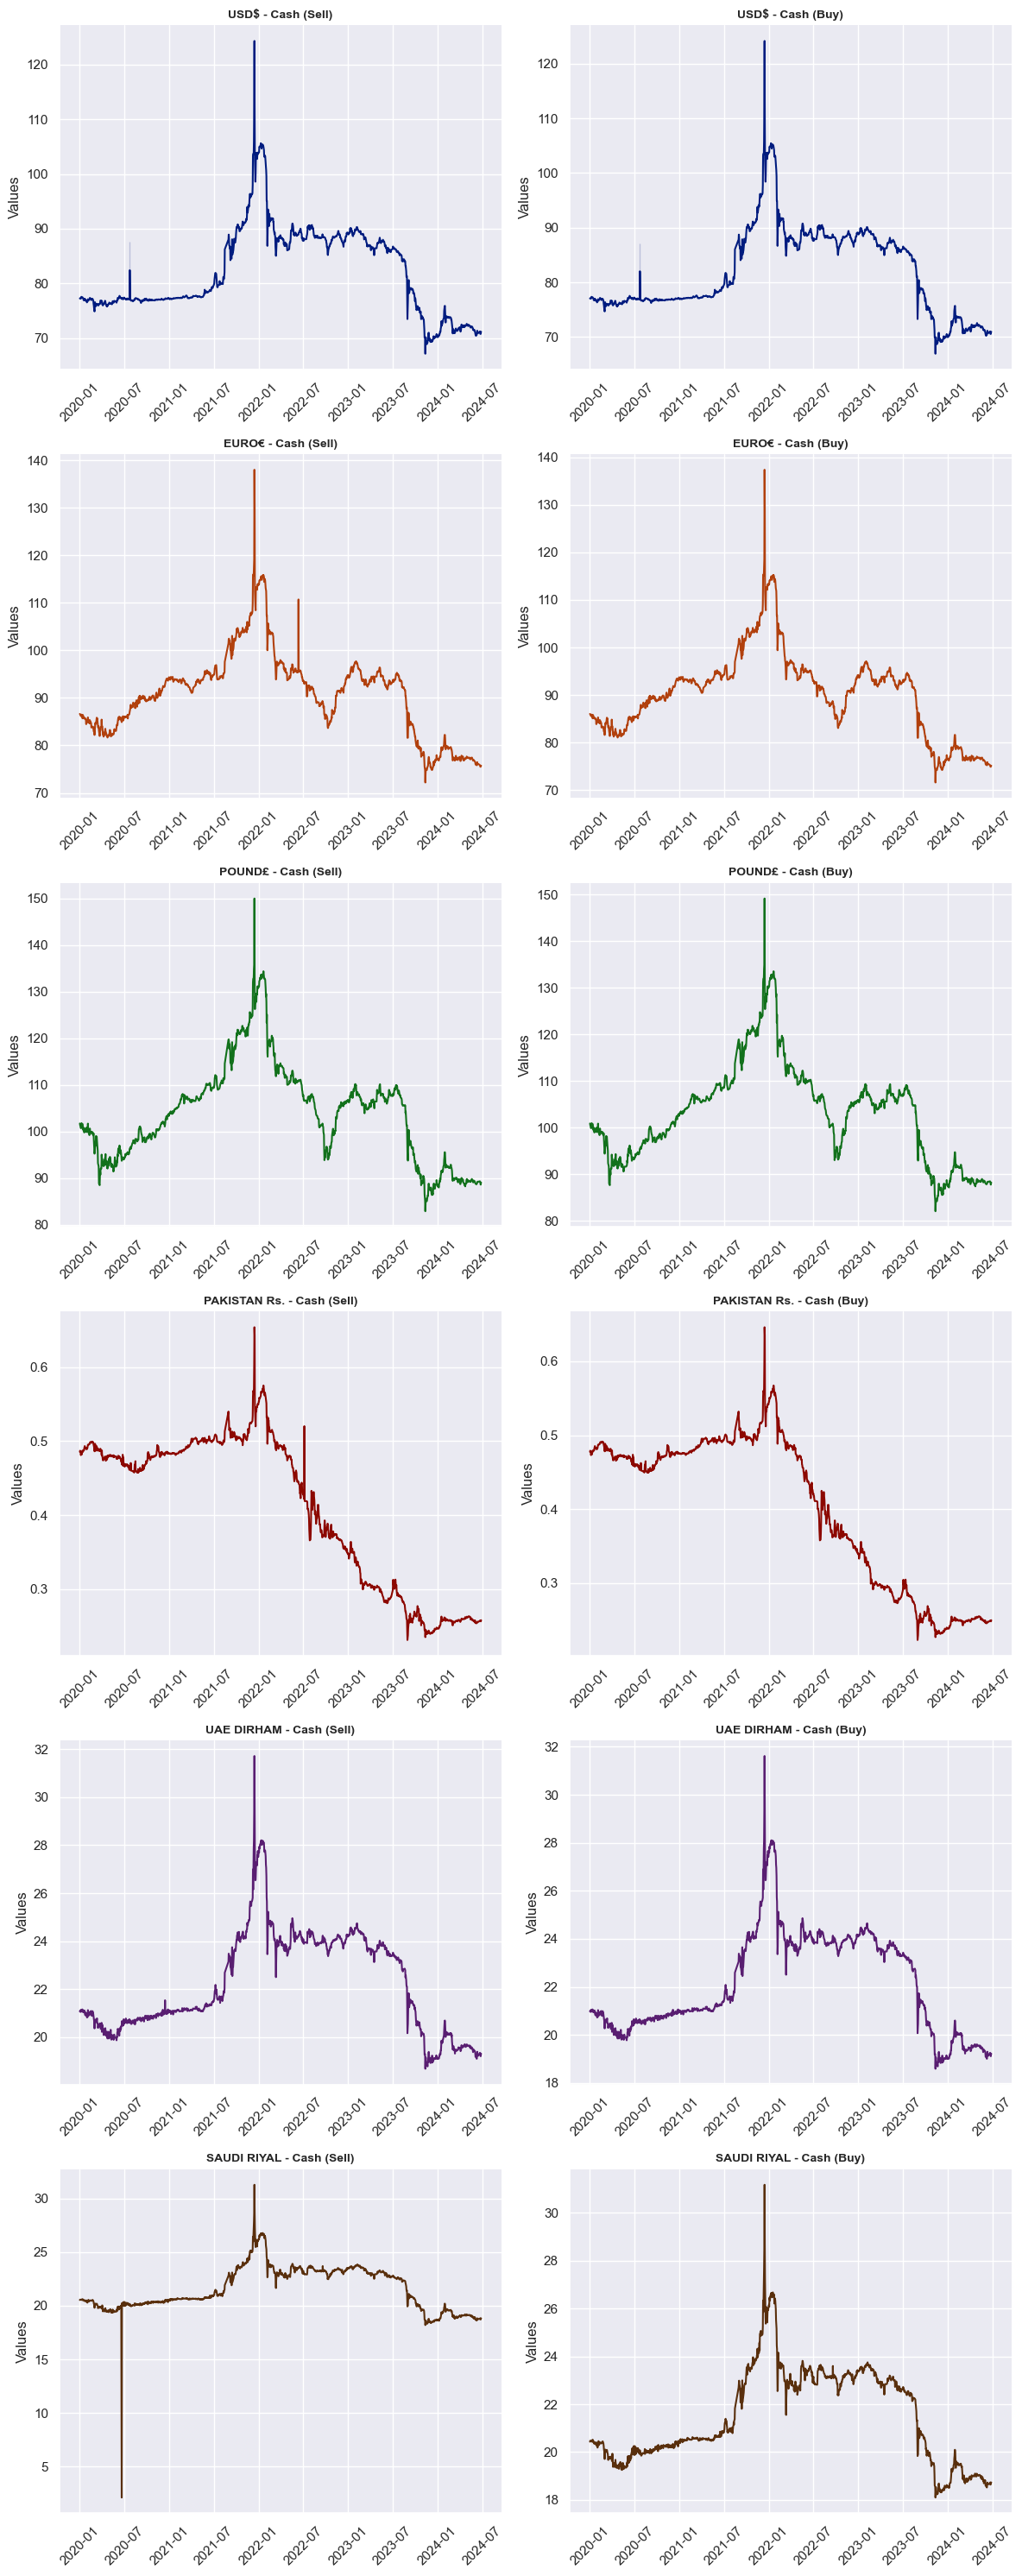

In [124]:
df = result[result['Currency_cleaned'].isin(["USD$", "EURO€", "POUND£", "PAKISTAN Rs.", "UAE DIRHAM", "SAUDI RIYAL"])]

# Convert Cash (Sell) and Cash (Buy) columns to numeric
df['Cash (Sell)'] = pd.to_numeric(df['Cash (Sell)'])
df['Cash (Buy)'] = pd.to_numeric(df['Cash (Buy)'])

# Select columns containing 'Cash_' and 'Currency_cleaned' and 'Date'
df = df[['Currency_cleaned', 'Date', 'Cash (Sell)', 'Cash (Buy)']]

# Melt the DataFrame to long format
df = pd.melt(df, id_vars=['Currency_cleaned', 'Date'], var_name='names', value_name='values')

# Remove rows with NaN values in 'values'
df = df.dropna(subset=['values'])
df['Date'] = pd.to_datetime(df['Date'])

# Plotting with seaborn facet grid
plt.figure(figsize=(12, 8))
sns.set(style="darkgrid")

g = sns.relplot(
    data=df, x='Date', y='values', 
    col='names', row='Currency_cleaned', hue='Currency_cleaned',
    kind='line', facet_kws={'sharey': False, 'sharex': False},
    palette='dark', legend=False, aspect=1.2
)

# Customizing plot aesthetics
g.set_axis_labels("", "")
g.fig.subplots_adjust(top=0.92, hspace=0.3)
g.set_titles(template='{row_name} - {col_name}', fontweight='bold', size=10)
g.set(ylabel="Values")

for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.tight_layout()
plt.show()

In [131]:
# result['Currency_cleaned'].value_counts()
# pd.to_datetime(result['Date']).dt.to_period('M').value_counts().sort_index()
# pd.to_datetime(result['Date']).dt.to_period('M').value_counts().sort_index().shape[0]